In [64]:

import cv2


import numpy as np
from matplotlib import pyplot as plt

def RGBTLUX(img):
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]

    width, height = img.shape[:2]
    
    L = np.zeros((width,height),np.uint8)
    U = np.zeros((width,height),np.uint8)
    X = np.zeros((width,height),np.uint8)
    L = (((np.float32(red)+1)**0.3)*((np.float32(green)+1)**0.6)*((np.float32(blue)+1)**0.6))-1

    if((L>=np.float32(red)).all()):
        U = 128*((np.float32(red)+1)/(L+1))
    else:
        U = 256 - 128*((L+1)/(np.float32(red)+1))
    
    if((L>=np.float32(blue)).all()):
        X = 128*((np.float32(blue)+1)/(L+1))
    else:
        X= 256 - 128*((L+1)/(np.float32(blue)+1))
   
    return L ,U , X
def LUXRGB(L,U,X):
    
    if (not U.all()<128):
        R=((U*(L+1))/128)-1
    else:
        R=((128)*(L+1)/(256-U))-1

    if ( X.all()<128):
        B=((X*(L+1))/128)-1
    else:
        B=((128)*(L+1)/(256-X))-1

    G=((L+1) /((R+1)**(0.3) * (B+1)**(0.6)))**(5/3) -1
    return R,G,B

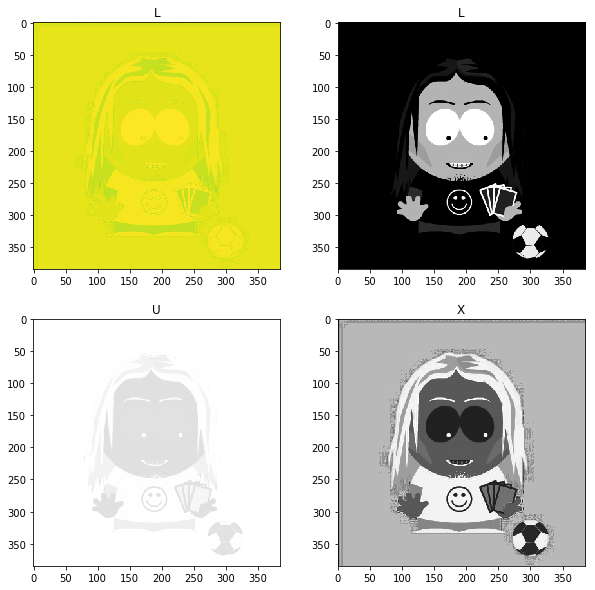

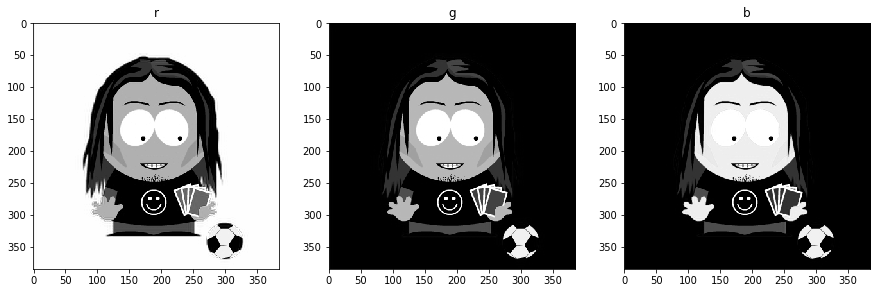

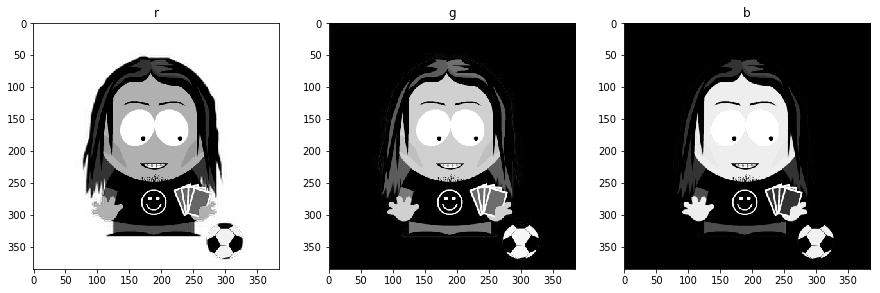

In [65]:
img = cv2.imread('Ej/example3.jpg',1)
L, U , X = RGBTLUX(img)
nuevoR,nuevoG,nuevoB=LUXRGB(L,U,X)
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]
plt.figure(1,figsize=(10,10))
plt.subplot(221), plt.imshow(L+U+X), plt.title('L')
plt.subplot(222), plt.imshow(L, cmap=plt.cm.gray), plt.title('L')
plt.subplot(223), plt.imshow(U, cmap=plt.cm.gray), plt.title('U')
plt.subplot(224), plt.imshow(X, cmap=plt.cm.gray), plt.title('X')
plt.figure(2,figsize=(15,5))
plt.subplot(131), plt.imshow(red, cmap=plt.cm.gray), plt.title('r')
plt.subplot(132), plt.imshow(green, cmap=plt.cm.gray), plt.title('g')
plt.subplot(133), plt.imshow(blue, cmap=plt.cm.gray), plt.title('b')

plt.figure(3,figsize=(15,5))
plt.subplot(131), plt.imshow(nuevoR, cmap=plt.cm.gray), plt.title('r')
plt.subplot(132), plt.imshow(nuevoG, cmap=plt.cm.gray), plt.title('g')
plt.subplot(133), plt.imshow(nuevoB, cmap=plt.cm.gray), plt.title('b')
plt.show()
cv2.imshow('Gris',img)
cv2.imshow('Color',nuevoR+nuevoG+nuevoB)
cv2.waitKey(0)
cv2.destroyAllWindows()